# Evaluate HammerDB Result

About the benchmark [1]:
> The TPC-C specification on which TPROC-C is based implements a computer system to fulfil orders from customers to supply products from a company. The company sells 100,000 items and keeps its stock in warehouses. Each warehouse has 10 sales districts and each district serves 3000 customers. The customers call the company whose operators take the order, each order containing a number of items. Orders are usually satisfied from the local warehouse however a small number of items are not in stock at a particular point in time and are supplied by an alternative warehouse. It is important to note that the size of the company is not fixed and can add Warehouses and sales districts as the company grows. For this reason your test schema can be as small or large as you wish with a larger schema requiring a more powerful computer system to process the increased level of transactions. The TPROC-C schema is shown below, in particular note how the number of rows in all of the tables apart from the ITEM table which is fixed is dependent upon the number of warehouses you choose to create your schema.

<img src="https://www.hammerdb.com/docs/resources/ch3-2.png" alt="drawing" width="600"/>

About the metrics [2]:
> HammerDB workloads produce 2 statistics to compare systems called **TPM** and NOPM respectively. NOPM value is based on a metric captured from within the test schema itself. As such **NOPM (New Orders per minute)** as a performance metric independent of any particular database implementation is the recommended primary metric to use.

References
1. https://www.hammerdb.com/docs/ch03s05.html
1. https://www.hammerdb.com/docs/ch03s04.html
1. https://www.hammerdb.com/docs/ch03.html

## Import Packages

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import pickle
# Some nice output
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display, Markdown
%matplotlib inline

import evaluator

## Prepare Result

### Pick Result

In [2]:
code = "1674056379"
path = "./"

### Start Evaluation

In [3]:
evaluation = evaluator.tpcc(code=code, path=path)

### Transform all Benchmarking Log Files to DataFrames

We also pick the first log file to be an example for later

In [4]:
filename_example = ""

directory = os.fsencode(path+"/"+code)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("bexhoma-benchmarker") and filename.endswith(".log"):
        #print("filename:", filename)
        pod_name = filename[filename.rindex("-")+1:-len(".log")]
        #print("pod_name:", pod_name)
        jobname = filename[len("bexhoma-benchmarker-"):-len("-"+pod_name+".log")]
        #print("jobname:", jobname)
        evaluation.end_benchmarking(jobname)
        filename_example = filename

.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log log is incomplete
Error in bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log
.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-p5qnl.log log is incomplete
Error in bexhoma-benchmarker-mariadb-4-1674056379-1-2-p5qnl.log
.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log log is incomplete
Error in bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log
.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-p5qnl.log log is incomplete
Error in bexhoma-benchmarker-mariadb-4-1674056379-1-2-p5qnl.log
.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log log is incomplete
Error in bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log
.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-p5qnl.log log is incomplete
Error in bexhoma-benchmarker-mariadb-4-1674056379-1-2-p5qnl.log
.//1674056379/bexhoma-benchmarker-mariadb-4-1674056379-1-2-7wbg7.log log is incomplete
Error i

### Show a DataFrame for single Pod as Example

In [5]:
filename = path+"/"+code+"/"+filename_example+".df.pickle"
print(filename)
df = pd.read_pickle(filename)
df

.//1674056379/bexhoma-benchmarker-postgresql-4-1674056379-1-2-vcbdh.log.df.pickle


,connection,configuration,experiment_run,client,pod,pod_count,iterations,duration,rampup,sf,run,errors,vusers_loading,vusers,NOPM,TPM,dbms
PostgreSQL-4-2,,,,,,,,,,,,,,,,,
0,PostgreSQL-4-2,PostgreSQL-4,1,2,vcbdh,2,10000000,5,2,4,0,0,4,1,6767,15522,PostgreSQL


### Transform all DataFrames into single Result DataFrame

In [6]:
evaluation.evaluate_results()

## Get Benchmarking Result

In [7]:
df = evaluation.get_df_benchmarking()

df

,connection,configuration,experiment_run,client,pod,pod_count,iterations,duration,rampup,sf,run,errors,vusers_loading,vusers,NOPM,TPM,dbms
connection_pod,,,,,,,,,,,,,,,,,
MariaDB-4-1-1,MariaDB-4-1,MariaDB-4,1,1,fcldv,1,10000000,5,2,4,0,0,4,1,9776,22695,MariaDB
MariaDB-4-2-1,MariaDB-4-2,MariaDB-4,1,2,hzc76,2,10000000,5,2,4,0,0,4,1,11981,27661,MariaDB
MariaDB-4-2-2,MariaDB-4-2,MariaDB-4,1,2,pdq8h,2,10000000,5,2,4,0,0,4,1,11218,25868,MariaDB
MySQL-4-1-1,MySQL-4-1,MySQL-4,1,1,lqk6b,1,10000000,5,2,4,0,0,4,1,214,483,MySQL
MySQL-4-2-1,MySQL-4-2,MySQL-4,1,2,f49vg,2,10000000,5,2,4,0,0,4,1,56,118,MySQL
MySQL-4-2-2,MySQL-4-2,MySQL-4,1,2,z52zw,2,10000000,5,2,4,0,0,4,1,56,118,MySQL
PostgreSQL-4-1-1,PostgreSQL-4-1,PostgreSQL-4,1,1,7t78z,1,10000000,5,2,4,0,0,4,1,10373,23710,PostgreSQL
PostgreSQL-4-2-1,PostgreSQL-4-2,PostgreSQL-4,1,2,j7hhq,2,10000000,5,2,4,0,0,4,1,6835,15697,PostgreSQL
PostgreSQL-4-2-2,PostgreSQL-4-2,PostgreSQL-4,1,2,vcbdh,2,10000000,5,2,4,0,0,4,1,6767,15522,PostgreSQL


### Reconstruct workflow out of result

In [8]:
evaluation.reconstruct_workflow(df)

{'MariaDB-4': [[1, 2]], 'MySQL-4': [[1, 2]], 'PostgreSQL-4': [[1, 2]]}

### Plot Results

#### Set data types for plotting

In [9]:
df_plot = evaluation.benchmarking_set_datatypes(df)

df_plot

,connection,configuration,experiment_run,client,pod,pod_count,iterations,duration,rampup,sf,run,errors,vusers_loading,vusers,NOPM,TPM,dbms
connection_pod,,,,,,,,,,,,,,,,,
MariaDB-4-1-1,MariaDB-4-1,MariaDB-4,1,1,fcldv,1,10000000,5,2,4,0,0,4,1,9776,22695,MariaDB
MariaDB-4-2-1,MariaDB-4-2,MariaDB-4,1,2,hzc76,2,10000000,5,2,4,0,0,4,1,11981,27661,MariaDB
MariaDB-4-2-2,MariaDB-4-2,MariaDB-4,1,2,pdq8h,2,10000000,5,2,4,0,0,4,1,11218,25868,MariaDB
MySQL-4-1-1,MySQL-4-1,MySQL-4,1,1,lqk6b,1,10000000,5,2,4,0,0,4,1,214,483,MySQL
MySQL-4-2-1,MySQL-4-2,MySQL-4,1,2,f49vg,2,10000000,5,2,4,0,0,4,1,56,118,MySQL
MySQL-4-2-2,MySQL-4-2,MySQL-4,1,2,z52zw,2,10000000,5,2,4,0,0,4,1,56,118,MySQL
PostgreSQL-4-1-1,PostgreSQL-4-1,PostgreSQL-4,1,1,7t78z,1,10000000,5,2,4,0,0,4,1,10373,23710,PostgreSQL
PostgreSQL-4-2-1,PostgreSQL-4-2,PostgreSQL-4,1,2,j7hhq,2,10000000,5,2,4,0,0,4,1,6835,15697,PostgreSQL
PostgreSQL-4-2-2,PostgreSQL-4-2,PostgreSQL-4,1,2,vcbdh,2,10000000,5,2,4,0,0,4,1,6767,15522,PostgreSQL


#### Restrict result to specific part

In [10]:
df[df['configuration']=='MariaDB-4']

,connection,configuration,experiment_run,client,pod,pod_count,iterations,duration,rampup,sf,run,errors,vusers_loading,vusers,NOPM,TPM,dbms
connection_pod,,,,,,,,,,,,,,,,,
MariaDB-4-1-1,MariaDB-4-1,MariaDB-4,1,1,fcldv,1,10000000,5,2,4,0,0,4,1,9776,22695,MariaDB
MariaDB-4-2-1,MariaDB-4-2,MariaDB-4,1,2,hzc76,2,10000000,5,2,4,0,0,4,1,11981,27661,MariaDB
MariaDB-4-2-2,MariaDB-4-2,MariaDB-4,1,2,pdq8h,2,10000000,5,2,4,0,0,4,1,11218,25868,MariaDB


In [11]:
#df_plot = df_plot[df_plot["experiment_run"]=="1"]
#df_plot = df_plot[df_plot["client"] == "1"]
df_plot

,connection,configuration,experiment_run,client,pod,pod_count,iterations,duration,rampup,sf,run,errors,vusers_loading,vusers,NOPM,TPM,dbms
connection_pod,,,,,,,,,,,,,,,,,
MariaDB-4-1-1,MariaDB-4-1,MariaDB-4,1,1,fcldv,1,10000000,5,2,4,0,0,4,1,9776,22695,MariaDB
MariaDB-4-2-1,MariaDB-4-2,MariaDB-4,1,2,hzc76,2,10000000,5,2,4,0,0,4,1,11981,27661,MariaDB
MariaDB-4-2-2,MariaDB-4-2,MariaDB-4,1,2,pdq8h,2,10000000,5,2,4,0,0,4,1,11218,25868,MariaDB
MySQL-4-1-1,MySQL-4-1,MySQL-4,1,1,lqk6b,1,10000000,5,2,4,0,0,4,1,214,483,MySQL
MySQL-4-2-1,MySQL-4-2,MySQL-4,1,2,f49vg,2,10000000,5,2,4,0,0,4,1,56,118,MySQL
MySQL-4-2-2,MySQL-4-2,MySQL-4,1,2,z52zw,2,10000000,5,2,4,0,0,4,1,56,118,MySQL
PostgreSQL-4-1-1,PostgreSQL-4-1,PostgreSQL-4,1,1,7t78z,1,10000000,5,2,4,0,0,4,1,10373,23710,PostgreSQL
PostgreSQL-4-2-1,PostgreSQL-4-2,PostgreSQL-4,1,2,j7hhq,2,10000000,5,2,4,0,0,4,1,6835,15697,PostgreSQL
PostgreSQL-4-2-2,PostgreSQL-4-2,PostgreSQL-4,1,2,vcbdh,2,10000000,5,2,4,0,0,4,1,6767,15522,PostgreSQL


#### Plot metrics

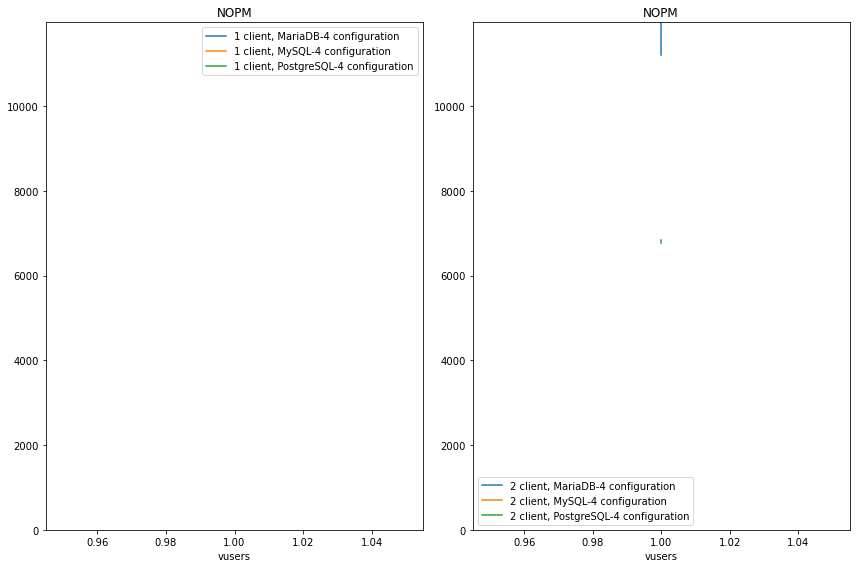

In [12]:
%matplotlib inline

x = "vusers"
y = "NOPM"
column = "configuration"
evaluation.plot(df_plot, column=column, x=x, y=y, plot_by="client")

### Aggregate by parallel pods

In [13]:
df = evaluation.get_df_benchmarking()
df_plot = evaluation.benchmarking_set_datatypes(df)
df_aggregated = evaluation.benchmarking_aggregate_by_parallel_pods(df_plot)
df_aggregated

,connection,configuration,experiment_run,client,pod,pod_count,iterations,duration,sf,run,errors,vusers_loading,vusers,NOPM,TPM,dbms
MariaDB-4-1,MariaDB-4-1,MariaDB-4,1,1,fcldv,1,10000000,5,4,0,0,4,1,9776,22695,MariaDB
MariaDB-4-2,MariaDB-4-2,MariaDB-4,1,2,hzc76pdq8h,2,10000000,5,4,0,0,4,2,11981,27661,MariaDB
MySQL-4-1,MySQL-4-1,MySQL-4,1,1,lqk6b,1,10000000,5,4,0,0,4,1,214,483,MySQL
MySQL-4-2,MySQL-4-2,MySQL-4,1,2,f49vgz52zw,2,10000000,5,4,0,0,4,2,56,118,MySQL
PostgreSQL-4-1,PostgreSQL-4-1,PostgreSQL-4,1,1,7t78z,1,10000000,5,4,0,0,4,1,10373,23710,PostgreSQL
PostgreSQL-4-2,PostgreSQL-4-2,PostgreSQL-4,1,2,j7hhqvcbdh,2,10000000,5,4,0,0,4,2,6835,15697,PostgreSQL


#### Plot

No handles with labels found to put in legend.


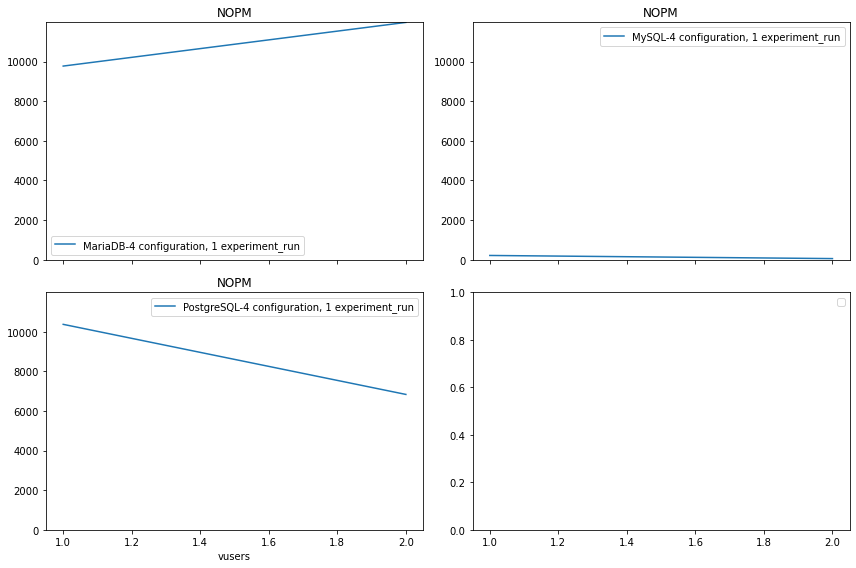

In [14]:
column = "experiment_run"
x = "vusers"
y = "NOPM"
evaluation.plot(df_aggregated, column=column, x=x, y=y, plot_by="configuration")

## Show Infos about Connections

In [15]:
import ast

with open(path+code+"/connections.config",'r') as inf:
    connections = ast.literal_eval(inf.read())

print("found", len(connections), "connections")

found 6 connections


In [16]:
import json
pretty_connections = json.dumps(connections, indent=2)

print(pretty_connections)

[
  {
    "version": "v11.4",
    "alias": "DBMS D",
    "docker_alias": "GP-B",
    "JDBC": {
      "driver": "org.postgresql.Driver",
      "auth": [
        "postgres",
        ""
      ],
      "url": "jdbc:postgresql://bexhoma-sut-postgresql-4-1674056379.perdelt.svc.cluster.local:9091/postgres",
      "jar": "./jars/postgresql-42.5.0.jar"
    },
    "dialect": "MonetDB",
    "active": true,
    "name": "PostgreSQL-4-1",
    "docker": "PostgreSQL",
    "script": "Schema",
    "info": [],
    "timeLoad": 67.62372010201216,
    "priceperhourdollar": 0.0,
    "hostsystem": {
      "RAM": 541037633536,
      "CPU": "AMD Opteron(tm) Processor 6378",
      "GPU": "",
      "GPUIDs": [],
      "Cores": 64,
      "host": "5.4.0-81-generic",
      "node": "cl-worker11",
      "disk": 1175827044,
      "datadisk": 903336,
      "cuda": "",
      "requests_cpu": "8",
      "requests_memory": "16Gi",
      "limits_cpu": 0,
      "limits_memory": 0
    },
    "worker": [],
    "connectionmanage

### Loading time per number of loading threads

In [17]:
connections_sorted = sorted(connections, key=lambda c: c['name']) 

for c in connections_sorted:
    print(c['name'], 
          c['timeLoad'], 
          '[s] for', 
          c['parameter']['connection_parameter']['loading_parameters']['PARALLEL'], 
          'threads on',
          c['hostsystem']['node'])

MariaDB-4-1 114.58742006868124 [s] for 4 threads on cl-worker11
MariaDB-4-2 114.58742006868124 [s] for 4 threads on cl-worker11
MySQL-4-1 180.62911394238472 [s] for 4 threads on cl-worker11
MySQL-4-2 180.62911394238472 [s] for 4 threads on cl-worker11
PostgreSQL-4-1 67.62372010201216 [s] for 4 threads on cl-worker11
PostgreSQL-4-2 67.62372010201216 [s] for 4 threads on cl-worker11


## Get monitoring metrics

### Loading

In [18]:
evaluation.transform_monitoring_results()

#### Example metric

In [19]:
evaluation.get_monitoring_metrics()

df = evaluation.get_monitoring_metric('total_cpu_memory')

df.T

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
MariaDB-4-1,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MariaDB-4-2,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,4197.910156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MySQL-4-1,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,...,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.742188
MySQL-4-2,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,407.738281,...,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.609375,19851.742188
PostgreSQL-4-1,1138.523438,1138.523438,1138.523438,1138.523438,1144.992188,1144.992188,1144.992188,1144.992188,1144.992188,1144.992188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostgreSQL-4-2,1138.523438,1138.523438,1138.523438,1138.523438,1144.992188,1144.992188,1144.992188,1144.992188,1144.992188,1144.992188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot all metrics

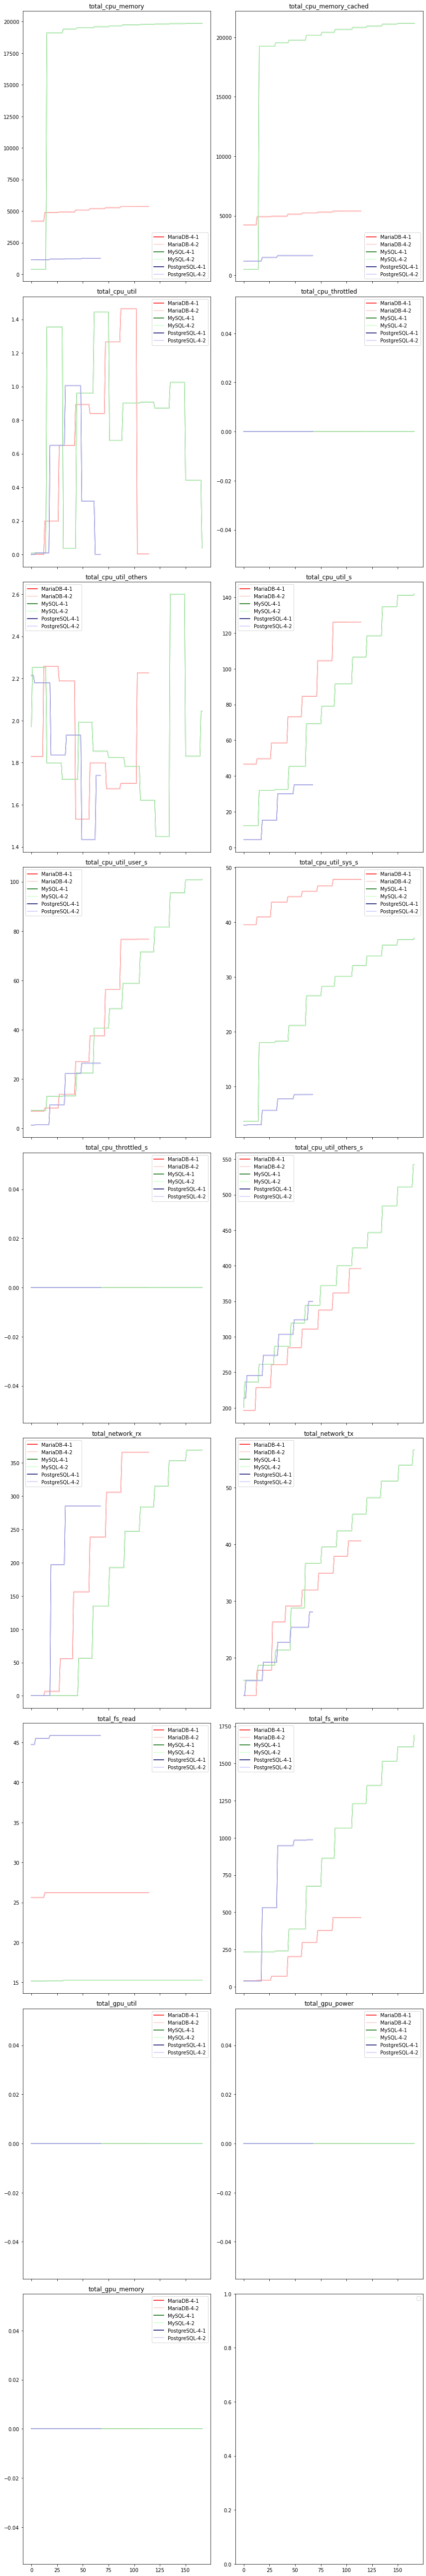

In [20]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='loading', dict_colors=dict_colors)

### Benchmarking

In [21]:
evaluation.transform_monitoring_results(component='stream')

#### Plot all metrics

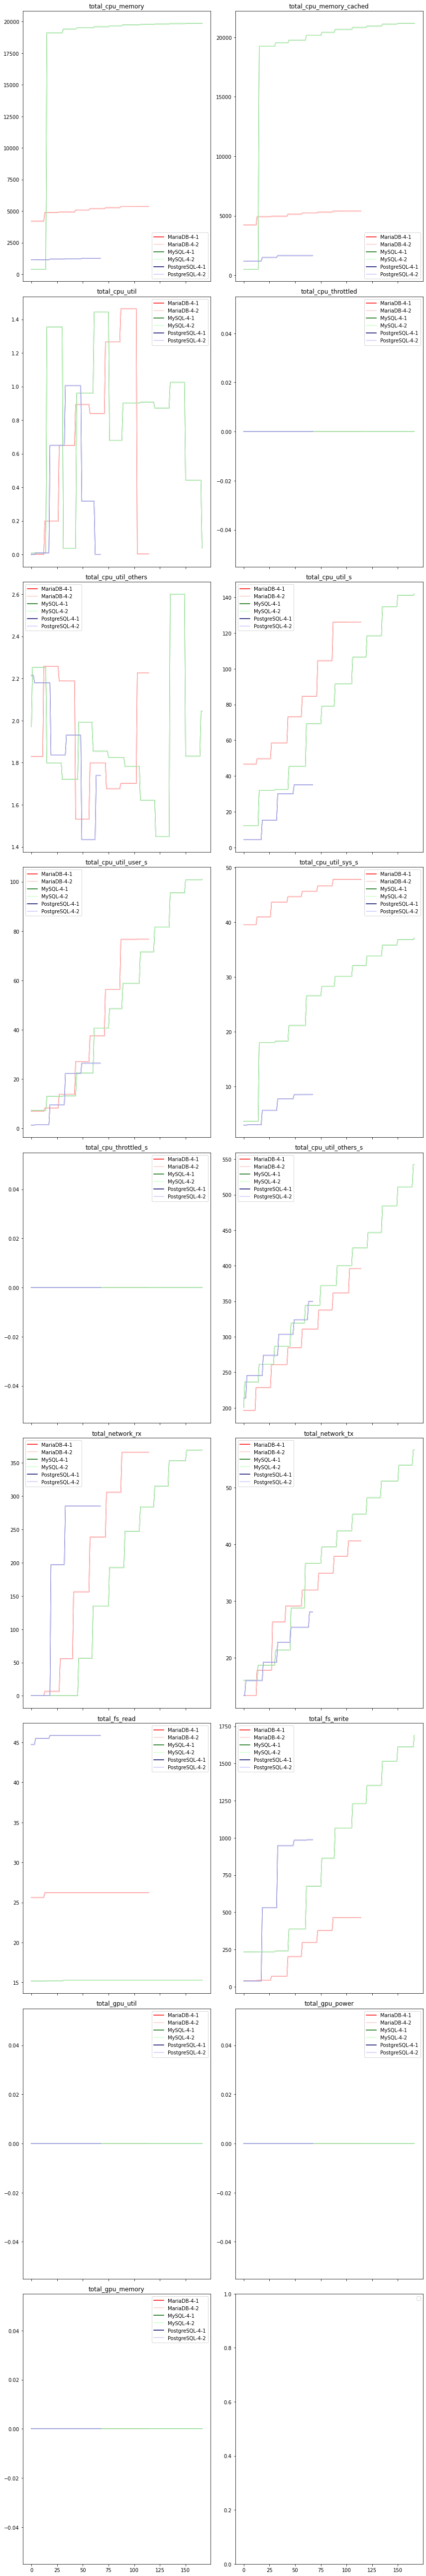

In [22]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='stream', dict_colors=dict_colors)